# TRABAJO TALLER FINAL DIPLOMADO INTELIGENCIA DE NEGOCIOS
# Parte 2: Preprocesamiento de datos

## INTRODUCCIÓN

## Descripción General del Problema
En el presente trabajo, se desarrolla un proyecto de retención de clientes para una entidad financiera particular, mediante la utilización de métodos predictivos que orienten el despliegue de acciones comerciales puntuales, que permitan maximizar el beneficio económico a la organización, dentro de un universo dado de clientes, de los cuales se posee una serie de datos específicos.

## Contenido del Reporte
La estructura del reporte consta de los siguientes apartados:


*   **Introducción:** Corresponde a la presente sección, en la cual se describe brevemente el caso de negocio estudiado.

*   **Análisis Estadístico de los Datos:** Desarrollo del Preprocesamiento de los datos existentes, en el cual se identifica su naturaleza y comportamiento, la completitud de la base existente, la transformación y selección de los datos y atributos relevantes.

*   **Aplicación de Modelos de Minería de Datos:** Entrenamiento y testeo de diversos modelos predictivos de Clasificación, en los datos preprocesados, evaluando sus desempeños y configuraciones, particularmente, en lo que a sus respectivos hiperparámetros se refiere.

*   **Selección de Modelo Predictivo:** Una vez conocidas las métricas de desempeño de los diversos modelos, se pasa a seleccionar el que habilite maximizar el beneficio económico esperado para la organización, basándose en una comparación intramodelos, complementado con la visión de costos y beneficios que implican la retención o fuga de cada caso de cliente.

*   **Políticas y Acciones Comerciales:** Definición de intención general de cómo abordar la retención de clientes y propuesta de acciones puntuales para su logro (Campaña Focalizada de Retención de Clientes).

*   **Discusión y Conclusiones:** Racconto de los principales hallazgos encontrados, supuestos y propuestas relaizadas. Síntesis y elaboración de conclusiones.


## Objetivos del Estudio
En forma global, se tiene como objetivo general aplicar modelos predictivos de clasificación para aumentar la retención de clientes en una entidad financiera, orientando el despliegue de acciones comerciales concretas, focalizadas en los casos que puedan ser identificados tempranamente.

De forma más puntual, tenemos los siguientes objetivos específicos:

1.   Explorar estadísticamente los datos disponibles.
2.   Establecer la base de datos preprocesada a utilizar.
3.   Aplicar una batería de modelos predictivos para clasificación.
4.   Seleccionar el mejor modelo predictivo.
5.   Proponer acciones específicas para una campaña de retención de clientes.
6.   Realizar predicciones sobre un conjunto de datos de validación.





## IMPORTACIÓN DE LIBRERÍAS, DATOS Y HERRAMIENTAS

A continuación se realiza la importación de las diversas librerías de Python a utilizar en el presente trabajo, con sus respectivos métodos, así como la definición de algunas funciones a aplicar.

En forma complementaria, se hace la importación inicial de los datos en su estado original, para ser utilizados.

In [ ]:
# manejo de datos
import numpy as np
import pandas as pd

# hay algunos warnings en la sección de "Desbalance de clases", con estas lineas los omitimos
import warnings
warnings.filterwarnings("ignore")

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection 
# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='inferno')

# desbalance de clases
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Oversampling
from imblearn.over_sampling import RandomOverSampler
# SMOTE
from imblearn.over_sampling import SMOTE

# indicadores de desempeño
# accuracy
from sklearn.metrics import accuracy_score
# ROC
from sklearn.metrics import roc_curve
# probabilidades de predicción
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

# algoritmos
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Logit
from sklearn.linear_model import LogisticRegression
# árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# tree (árbol de decisión gráfico)
from sklearn import tree
# SVM
from sklearn.svm import SVC
# random forest
from sklearn.ensemble import RandomForestClassifier




In [ ]:
# @markdown Definición de Test de Kolmogorov - Smirnov
def ecdf(data):
    # Computa la distribución empirica acumulada (ECDF por sus siglas en ingles)
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x,y

def plot_kolmogorov(sample1, sample2, alpha=0.05):
  import matplotlib.pyplot as plt
  from scipy import stats
  # obtenemos la ECDF para cada muestra y las ordenamos
  x1,y1 = ecdf(sample1)
  x2,y2 = ecdf(sample2)
  # plot
  plt.figure(figsize=(9, 6))
  sns.lineplot(x=x1, y=y1, color='red')
  sns.lineplot(x=x2, y=y2, color='blue')
  # test
  stat, p_val = stats.ks_2samp(sample1, sample2)
  # interpretamos el p-value 
  print(f"p-value: {round(p_val,4)} | alpha: {alpha}") 
  if p_val <= alpha: 
      print('Las distribuciones son independientes (Rechaza Hipótesis Nula)') 
  else: 
      print('Las distribuciones son dependientes (Acepta Hipótesis Nula)') 
  plt.ylabel("Cumulative Distribution Function")
  plt.xlabel('x')
  plt.show()

# PREPROCESAMIENTO DE DATOS

Teniendo una visión general de la naturaleza de los datos disponibles, corresponde seguir con la preparación de los mismos para ser utilizados posteriormente en los algotirmos predictivos.

## Tratamiento de Datos Faltantes y Valores Extremos

Según lo visto anteriormente, tenemos 6 atributos que suman un total de 41 datos faltantes, así como un atributo que posee 3 datos fuera de rango y 3 valores extremos (outliers).

In [ ]:
# @title Tabla Resumen de Datos Faltantes y Valores Extremos
# Listas para Columnas
Atributo = ['GENERO', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_COM', 'CIUDAD']
Tipo_Escala = ['Nominal', 'Absoluta', 'Ordinal', 'Nominal', 'Nominal', 'Nominal']
Cantidad_Faltantes = [11, 2, 11, 11, 3, 3]
Cantidad_Extremos = [0, 3, 0, 0, 0, 0]
Cantidad_FueraRango = [0, 3, 0, 0, 0, 0]
# Encabezado de Tabla
TD = pd.DataFrame({'Atributo': Atributo, 'Tipo de Escala': Tipo_Escala, 'Cantidad Datos Faltantes': Cantidad_Faltantes, 'Cantidad Datos Extremos': Cantidad_Extremos, 'Cantidad Datos Fuera Rango': Cantidad_FueraRango})
TD

,Atributo,Tipo de Escala,Cantidad Datos Faltantes,Cantidad Datos Extremos,Cantidad Datos Fuera Rango
0,GENERO,Nominal,11,0,0
1,EDAD,Absoluta,2,3,3
2,NIV_EDUC,Ordinal,11,0,0
3,E_CIVIL,Nominal,11,0,0
4,COD_COM,Nominal,3,0,0
5,CIUDAD,Nominal,3,0,0


**Comentarios:** \\
A partir de aquí, las estrategias de tratamiento de dichos datos faltantes y extremos difiere dependiendo tanto del tipo de escala asociada, de la cantidad de registros involucrados, así como de la naturaleza particular del negocio.

1. Para la variable "EDAD", dado que pertenece a la escala absoluta, se propone realizar una sustitución de los valores faltantes, fuera de rango y extremos mediante el método de imputación AD-HOC usando la moda.

2. Por su parte, para los valores faltantes de la variable "NIV_EDUC", cuya escala es de tipo ordinal, se propone reemplazar los niveles expresados por un string, por valores numéricos que muestren el equivalente en años de estudio para cada categoría. Una vez realizado el reemplazo, utilizar el algoritmo de imputación AD-HOC para asignar un valor de acuerdo a la moda.

3. En relación con las variables restantes, todas pertenecientes a la escala nominal, el tratamiento es de naturaleza especial, según sea caso.

4. De este modo, para el atributo "GENERO", por tratarse de una variable binaria, con 11 datos faltantes, se propone reemplazar los valores originales M y F por los valores numéricos 0 y 1, para luego aplicar el método de imputación AD-HOC usando la moda dada su naturaleza. 

4. En forma análoga a la anterior, para el atributo "E_CIVIL", por tratarse de una variable nominal con 4 estados posibles, en la cual hay presentes 11 datos faltantes, también se propone reemplazar los valores originales CAS, SOL, SEP y VIU por los valores numéricos 1, 2, 3 y 4, para luego aplicar el método de imputación AD-HOC, usando la moda.

5. Finalmente, para las variables de escala nominal "COD_COM" y "CIUDAD", solo existen 3 datos faltantes en cada una, siendo menor el impacto de la alteración que podrían generar en la base de datos original, si es que son reemplazados por algún valor específico. Dado que sus posibles estados, es decir, el conjunto de valores que pueden tomar es muy amplio, no es factible replicar los tratamientos anteriores, de modo que una solución posible, es reemplazarlos los datos faltantes por las modas de cada variable. Cabe mencionar que, tal como se observó anteriormente, el código de la comuna y la ciudad tinen relación, correspondiendo el código 90 a la ciudad de Santiago, siendo además dichos valores los resultados para las modas de cada atributo. De este modo, es consistente la sustitución en ambos casos para ese par de valores.

In [ ]:
Datos = pd.read_csv("https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_GENERAL.csv", sep=",")

A continuación se desarrollan los reemplazos de datos inconsistentes, según la metodología planteada anteriormente.

### Sustitución de variables binarias y nominales

In [ ]:
Datos2 = Datos.copy()

In [ ]:
# @markdown Sustitución de Valores Variable Binaria GENERO
Datos2['GENERO'].replace({'M': 0, 'F': 1}, inplace=True)
print(Datos2['GENERO'].value_counts())

0.0    1385
1.0     898
Name: GENERO, dtype: int64


In [ ]:
# @markdown Sustitución de Valores Variable Nominal E_CIVIL
Datos2['E_CIVIL'].replace({'CAS': 1, 'SOL': 2, 'SEP': 3, 'VIU': 4}, inplace=True)
print(Datos2['E_CIVIL'].value_counts())

1.0    1429
2.0     642
3.0     114
4.0      98
Name: E_CIVIL, dtype: int64


In [ ]:
# @markdown Sustitución de Valores Variable Ordinal NIV_EDUC
Datos2['NIV_EDUC'].replace({'UNV': 18, 'TEC': 14, 'MED': 12, 'EUN': 15, 'BAS': 8}, inplace=True)
print(Datos2['NIV_EDUC'].value_counts())

18.0    947
14.0    698
12.0    615
15.0     12
8.0      11
Name: NIV_EDUC, dtype: int64


Para el caso del atributo de nivel educacional, se debe definir inicialmente los valores que sustituirán a los strings correspondientes a los diferentes modelos.

Una opción posible, con tal de aprovechar la naturaleza ordinal de la variable, es poder asignarle el valor correspondiente al número de años acumulados equivalente para cada nivel de estudios.

De este modo, tenemos la siguiente sustitución:


*   UNV = 18
*   TEC = 14
*   MED = 12
*   EUN = 15
*   BAS = 8



In [ ]:
Datos2['SEGURO'].replace({'SI': 1, 'NO': 0}, inplace=True)
print(Datos2['SEGURO'].value_counts())



0    1816
1     478
Name: SEGURO, dtype: int64


In [ ]:
Datos2['FUGA'].replace({'FUGA': 1, 'NO FUGA': 0}, inplace=True)
print(Datos2['FUGA'].value_counts())


0    1157
1    1137
Name: FUGA, dtype: int64


In [ ]:
Datos2['CIUDAD'].replace({'LOS ANGELES':1, 'SANTIAGO':2, 'ANTOFAGASTA':3, 'ARICA':4, 'CONCEPCION':5, 'TALCAHUANO':6, 'TEMUCO':7, 'RANCAGUA':8, 'CHUQUICAMATA':9, 'PUERTO OCTAY':10, 'CALAMA':11, 'PUNTA ARENAS':12, 'CON-CON':13, 'VLLA ALEMANA':14, 'OSORNO':15, 'IQUIQUE':16, 'VINA DEL MAR':17, 'TALAGANTE':18, 'LA SERENA':19, 'SAN FELIPE':20, 'RENGO':21, 'CASTRO':22, 'CHILLAN':23, 'COLBUN':24, 'PENAFLOR':25, 'VALDIVIA':26, 'EL SALVADOR':27, 'COYHAIQUE':28, 'ANCUD':29, 'COQUIMBO':30, 'LONCOCHE':31, 'CURICO':32, 'LOS ANDES':33, 'SAN CLEMENTE':34, 'PALENA':35, 'LLANQUIHUE':36, 'LLO-LLEO':37, 'SAN PABLO':38, 'QUILPUE':39, 'CALDERA':40, 'MELIPILLA':41, 'TALCA':42, 'SAN FERNANDO':43, 'PUERTO MONTT':44, 'QUILLOTA':45, 'VALPARAISO':46, 'LA CALERA':47, 'STO DOMINGO':48, 'CURACAVI':49, 'AYSEN':50, 'LOS VILOS':51, 'PANGUIPULLI':52, 'CORONEL':53, 'COPIAPO':54, 'PUERTO VARAS':55, 'LINARES':56, 'SAN PEDRO':57, 'TOCOPILLA':58, 'ANGOL':59, 'PARRAL':60, 'SAN ESTEBAN':61, 'HIJUELAS':62, 'SAN ANTONIO':63, 'MACHALI':64, 'VALLENAR':65, 'CALBUCO':66, 'SANTA CRUZ':67, 'HUASCO':68, 'LOS LAGOS':69, 'VILLARRICA':70, 'LA CRUZ':71, 'PETORCA':72, 'OVALLE':73, 'DONIHUE':74, 'PENCO':75}, inplace=True)
print(Datos2['CIUDAD'].value_counts())

2.0     1389
4.0      234
5.0      152
3.0       47
17.0      42
        ... 
53.0       1
34.0       1
51.0       1
69.0       1
75.0       1
Name: CIUDAD, Length: 75, dtype: int64


### MÉTODO: Imputación ad-hoc

In [ ]:
# @markdown Reemplazo por la moda: \\
# @markdown COD_COM, CIUDAD, E_CIVIL, NIV_EDUC y GENERO
# Copia de Base de Datos
# Reemplazar Datos Faltantes en Variable "COD_COM"
Datos2['COD_COM'].fillna(Datos2['COD_COM'].mode().iloc[0], inplace=True)
# Reemplazar Datos Faltantes en Variable "CIUDAD"
Datos2['CIUDAD'].fillna(Datos2['CIUDAD'].mode().iloc[0], inplace=True)
# Reemplazar Datos Faltantes en Variable "E_CIVIL"
Datos2['E_CIVIL'].fillna(Datos2['E_CIVIL'].mode().iloc[0], inplace=True)
# Reemplazar Datos Faltantes en Variable "NIV_EDUC"
Datos2['NIV_EDUC'].fillna(Datos2['NIV_EDUC'].mode().iloc[0], inplace=True)
# Reemplazar Datos Faltantes en Variable "NIV_EDUC"
Datos2['GENERO'].fillna(Datos2['GENERO'].mode().iloc[0], inplace=True)
# Mostrar DataFrame luego de Reemplazo
Datos2.isna().sum()

ID              0
GENERO          0
RENTA           0
EDAD            2
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
CIUDAD          0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64

Del recuento anterior de datos faltantes, se puede observar que los atributos "COD_COM" y "CIUDAD", ya no presentan anomalías, puesto que sus datos perdidos fueron reemplazados por las modas respectivas de cada variable.

### MÉTODO: Imputación Múltiple

In [ ]:
# @markdown Reemplazo Temporal de Datos Extremos y Fuera de Rango por NaN: \\
# @markdown Variable Edad 
# Crear Copia de DataFrame con Avance Anterior
Datos3 = Datos2.copy()
# Reemplazar Valores Inconsistentes en Variable 'EDAD' por NaN
Datos3.loc[Datos3['EDAD']>98, 'EDAD'] = np.nan
Datos3.loc[Datos3['EDAD']<0, 'EDAD'] = np.nan
print("Cantidad Previa de Datos Faltantes para cada Atributo")
print(Datos3.isna().sum())


Cantidad Previa de Datos Faltantes para cada Atributo
ID              0
GENERO          0
RENTA           0
EDAD            8
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
CIUDAD          0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64


Del listado anterior podemos ver que la variable "EDAD" pasó de 2 a 8 datos NaN, puesto que los valores fuera de rango, correspondientes a las edades negativas, así como los valores extremos mayores a 98, fueron sustituidos temporalmente, para luego ser reemplazados mediante el método de imputación múltiple.

In [ ]:
# Implementar Método de Imputación
mice =  IterativeImputer(random_state=0)
mice.fit(Datos3._get_numeric_data())
Datos3[Datos3._get_numeric_data().columns] = mice.transform(Datos3._get_numeric_data()).round(2)
# Mostrar Resultados
print(f"Filas Resultantes: {len(Datos3)}")
print(Datos3.isna().sum())

Filas Resultantes: 2294
ID              0
GENERO          0
RENTA           0
EDAD            0
NIV_EDUC        0
E_CIVIL         0
COD_OFI         0
COD_COM         0
CIUDAD          0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64


Del listado anterior podemos observar que ya no existen datos faltantes en la base de datos. De manera complementaria se han abordado los valores fuera de rango y los valores extremos del atributo "EDAD".

In [ ]:
Datos3.head(50)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1.0,0.0,746476.0,39.00,12.0,1.0,68.0,213.0,1.0,0.0,38292.0,0.0,434357.0,1766.0,9110.0,340.0,2.0,2000000.0,0.0,0.0
1,2.0,1.0,11901.0,49.00,12.0,4.0,16.0,89.0,2.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,1.0,7500000.0,1.0,0.0
2,3.0,0.0,1651421.0,39.00,14.0,1.0,90.0,16.0,3.0,0.0,604169.0,0.0,0.0,323.0,26489.0,2925.0,1.0,8000000.0,0.0,0.0
3,4.0,1.0,638969.0,36.00,18.0,1.0,85.0,115.0,2.0,0.0,5125.0,0.0,198998.0,94.0,0.0,105.0,1.0,2600000.0,0.0,0.0
4,5.0,0.0,860113.0,44.00,14.0,1.0,45.0,80.0,2.0,0.0,11946.0,0.0,73959.0,149.0,0.0,272.0,1.0,6400000.0,0.0,0.0
5,6.0,0.0,329463.0,40.00,14.0,1.0,53.0,92.0,2.0,0.0,187538.0,0.0,12008.0,641.0,118.0,154.0,2.0,7700000.0,0.0,1.0
6,7.0,0.0,28732.0,45.00,18.0,1.0,55.0,90.0,2.0,559984.0,532706.0,0.0,0.0,1464.0,15600.0,1523.0,1.0,2900000.0,0.0,1.0
7,8.0,1.0,11563.0,41.00,14.0,2.0,47.0,112.0,2.0,0.0,141317.0,0.0,525325.0,13.0,0.0,477.0,1.0,2100000.0,1.0,0.0
8,9.0,1.0,3044549.0,33.00,12.0,1.0,22.0,1.0,4.0,0.0,102078.0,0.0,0.0,44.0,0.0,0.0,1.0,1600000.0,0.0,0.0
9,10.0,1.0,3632707.0,39.00,12.0,4.0,27.0,89.0,2.0,0.0,162658.0,0.0,445896.0,865.0,0.0,907.0,1.0,2800000.0,0.0,0.0


In [ ]:
Datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2294 non-null   float64
 1   GENERO        2294 non-null   float64
 2   RENTA         2294 non-null   float64
 3   EDAD          2294 non-null   float64
 4   NIV_EDUC      2294 non-null   float64
 5   E_CIVIL       2294 non-null   float64
 6   COD_OFI       2294 non-null   float64
 7   COD_COM       2294 non-null   float64
 8   CIUDAD        2294 non-null   float64
 9   D_Marzo       2294 non-null   float64
 10  D_Abril       2294 non-null   float64
 11  D_Mayo        2294 non-null   float64
 12  D_Junio       2294 non-null   float64
 13  D_Julio       2294 non-null   float64
 14  D_Agosto      2294 non-null   float64
 15  D_Septiembre  2294 non-null   float64
 16  M_MOROSO      2294 non-null   float64
 17  MONTO         2294 non-null   float64
 18  SEGURO        2294 non-null 

In [ ]:
Datos3.describe()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
count,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.000000
mean,1147.500000,0.391456,8.527563e+05,43.563339,15.110724,1.507411,68.542720,107.921534,7.962075,1.530206e+05,2.726810e+05,1.032315e+05,1.899761e+05,566.848736,3578.760680,1940.639494,1.250218,3.477092e+06,0.208370,0.495641
std,662.365081,0.488182,1.379715e+06,7.978769,2.588670,0.778408,40.164768,84.720041,13.547540,4.981875e+05,4.023257e+05,8.706984e+05,6.705042e+05,1075.329388,8942.383207,9868.816840,0.751906,2.292933e+06,0.406231,0.500090
min,1.000000,0.000000,1.760000e+02,23.000000,8.000000,1.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,0.000000
25%,574.250000,0.000000,1.003815e+05,39.000000,12.000000,1.000000,31.000000,80.000000,2.000000,0.000000e+00,1.767425e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,0.000000,0.000000
50%,1147.500000,0.000000,3.699345e+05,44.000000,14.000000,1.000000,56.000000,90.000000,2.000000,0.000000e+00,1.344745e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06,0.000000,0.000000
75%,1720.750000,1.000000,8.267582e+05,50.000000,18.000000,2.000000,92.000000,118.000000,5.000000,0.000000e+00,3.744250e+05,0.000000e+00,1.749060e+05,629.750000,1486.250000,497.250000,2.000000,4.800000e+06,0.000000,1.000000
max,2294.000000,1.000000,8.454317e+06,64.000000,18.000000,4.000000,155.000000,516.000000,75.000000,9.458161e+06,5.495534e+06,1.839696e+07,2.063461e+07,11187.000000,88837.000000,249652.000000,3.000000,8.000000e+06,1.000000,1.000000


## Nuevas Variables

A modo de explorar las distancias que existen entre los montos de deuda se crean nuevas variables extraídas desde el rango de fechas disponible de Marzo a Septiembre, estas son las siguientes:
 
Valor de la deuda mínima			: ‘D_min’ ;
Valor de la deuda máxima			: ‘D_max’ ;
Desviación estándar del periodo de deudas	:  ‘D_std’


In [ ]:
df = Datos3.copy()

In [ ]:
#Conversion de float a enteros para efectos de calculo.
df[['ID', 'GENERO',	'RENTA',	'EDAD',	'NIV_EDUC',	'E_CIVIL',	'COD_OFI',	'COD_COM', 'D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre',	'M_MOROSO',	'MONTO' ]] = df[['ID', 'GENERO',	'RENTA',	'EDAD',	'NIV_EDUC',	'E_CIVIL',	'COD_OFI',	'COD_COM', 'D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre',	'M_MOROSO',	'MONTO' ]].astype(int)
#df.head(3)

In [ ]:
#Copia de dataframes para evitar sobreescritura
df1=df.copy()
dfm=df1.copy()

### Min, Max y Desv.

In [ ]:
# @markdown Variables de deuda Min, Max y desviación estándar
dfm=dfm[['D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre']]
dfm.replace(0, np.nan, inplace=True)
df1['D_min']= dfm.min(axis=1)
df1['D_max']= dfm.max(axis=1)
df1['D_std']= df[['D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre']].std(axis=1).astype(int)
df1 = df1[['ID', 'GENERO',	'RENTA',	'EDAD',	'NIV_EDUC',	'E_CIVIL',	'COD_OFI',	'COD_COM', 'CIUDAD', 'D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre',	'D_min',	'D_max'	,'D_std','M_MOROSO',	'MONTO', 'SEGURO',	'FUGA']]
df1.fillna(method='ffill', inplace=True)
df1.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0


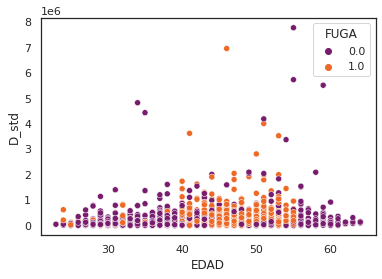

In [ ]:
#Vsisualizaciones aleatorias en busca de patrones previos a la normalización con referencia nueva variable
sns.scatterplot(x='EDAD', y='D_std',  hue='FUGA', data= df1, palette="inferno")

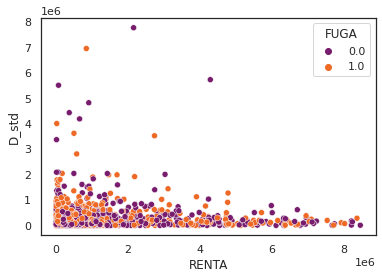

In [ ]:
sns.scatterplot(x='RENTA', y='D_std',  hue='FUGA', data= df1, palette="inferno")

### Dinamismo de la Deuda Mensual

Considerando que existen los montos de deuda para 7 meses consecutivos, asociados a cada cliente, se puede modelar el dinamismo de la deuda. Puntualmente, dicho dinamismo se puede representar, entre otras formas, por la razón entre el mes actual y el mes anterior.

De este modo, a continuación, se realiza el cálculo de la comparación antes mencionada.

In [ ]:
def RelacionSeries(Serie1, Serie2):
  SerieR = []
  Razon = float()
  length = len(Serie1)
  for k in length:
    if (Serie1[k] == 0) & (Serie2[k] == 0):
      Razon = 0
    elif (Serie1[k] != 0) & (Serie2[k] == 0):
      Razon = Serie1[k]
    else:
      Razon = Serie1[k]/Serie2[k]
    SerieR.append(Razon)
  return SerieR

In [ ]:
df2 = df1.copy()
df2['D_Marzo2']= df2['D_Marzo']+1
#df2.replace({'D_Marzo2': {0:1}})
df2['D_Abril2']= df2['D_Abril']+1
#df2.replace({'D_Abril2': {0:1}})
df2['D_Mayo2']= df2['D_Mayo']+1
#df2.replace({'D_Mayo2': {0:1}})
df2['D_Junio2']= df2['D_Junio']+1
#df2.replace({'D_Junio2': {0:1}})
df2['D_Julio2']= df2['D_Julio']+1
#df2.replace({'D_Julio2': {0:1}})
df2['D_Agosto2']= df2['D_Agosto']+1
#df2.replace({'D_Agosto2': {0:1}})
df2['D_Septiembre2']= df2['D_Septiembre']+1
#df2.replace({'D_Septiembre2': {0:1}})

In [ ]:
# @markdown Relación de Variación Mensual de Monto de Deuda
# Cálculo Variación Abril/Marzo
df2['VM_AbrilMarzo'] = df2['D_Abril2']/df2['D_Marzo2']
# Cálculo Variación Mayo/Abril
df2['VM_MayoAbril'] = df2['D_Mayo2']/df2['D_Abril2']
# Cálculo Variación Junio/Mayo
df2['VM_JunioMayo'] = df2['D_Junio2']/df2['D_Mayo2']
# Cálculo Variación Julio/Junio
df2['VM_JulioJunio'] = df2['D_Julio2']/df2['D_Junio2']
# Cálculo Variación Agosto/Julio
df2['VM_AgostoJulio'] = df2['D_Agosto2']/df2['D_Julio2']
# Cálculo Variación Septiembre/Agosto
df2['VM_SeptiembreAgosto'] = df2['D_Septiembre2']/df2['D_Agosto2']
df2.head(5).round(3)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.0,434358.0,0.004,5.156,0.037
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.0,1.0,49.000,0.020,1.000
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.0,1.0,324.000,81.759,0.110
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.0,198999.0,0.000,0.011,106.000
4,5,0,860113,44,14,1,45,80,2.0,0,11946,0,73959,149,0,272,149.0,73959.0,27532,1,6400000,0.0,0.0,1,11947,1,73960,150,1,273,11947.0,0.0,73960.0,0.002,0.007,273.000


En la tabla anterior se observa la incorporación de 6 nuevos atributos, correspondientes a las razones de la deuda mensual, para dos meses consecutivos, en todo el intervalo de tiempo comprendido entre Marzo y Septiembre. Al considerar en el denominador, y por ende como referencia, el mes "i" o anterior y en el numerador el mes "i+1" o siguiente, podemos obtener una idea de la variación que presentó la deuda a fin del mes i+1 en relación a como terminó en el mes i, recordando que las deudas en meses distintos no se traspasan ni acumulan.

Es importante señalar que para efectos de cálculo, puntualmente para evitar indefiniciones, se ha sumado $1 a la deuda de cada cliente en cada mes. Este efecto es despreciable en lo que a monto se refiere y no induce mayores errores en la medida de la variación mensual.

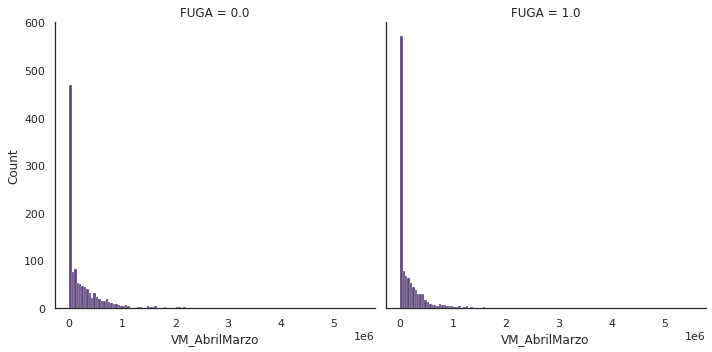

In [ ]:
sns.displot(data=df2, x='VM_AbrilMarzo', col='FUGA')

De la distribución presentada en los gráficos anteriores, es clara la altísima concentración en valores pequeños, junto a la existencia de pocos valores muy altos. De este modo, toma sentido aplicar una transformación logarítmica, para estudiar mejor el comportamiento de la nueva variable.

A continuación se realiza la transformación logarítmica mencionada. Con tal de evitar problemas de indefinición, se le suma 1 en el argumento del logaritmo.

In [ ]:
df2['logVM_MayoAbril']=np.log(df2['VM_MayoAbril']+1)
df2['logVM_JunioMayo']=np.log(df2['VM_JunioMayo']+1)
df2['logVM_JulioJunio']=np.log(df2['VM_JulioJunio']+1)
df2['logVM_AgostoJulio']=np.log(df2['VM_AgostoJulio']+1)
df2['logVM_SeptiembreAgosto']=np.log(df2['VM_SeptiembreAgosto']+1)

In [ ]:
df2['logVM_AbrilMarzo']=np.log(df2['VM_AbrilMarzo']+1)

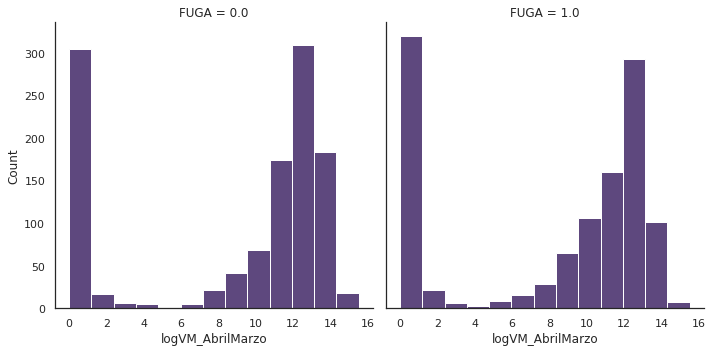

In [ ]:
sns.displot(data=df2, x='logVM_AbrilMarzo', col='FUGA')

De la distribución anterior, podemos observar comportamiento muy similar de la variación mensual de la deuda de Marzo a Abril en el set de datos analizados, independiente de si los clientes caen o no en fuga. Particularmente, se tiene una gran cantidad de clientes que mantuvieron su deuda (transformada) de un mes a otro, que corresponden a los datos de clientes concentrados en el tramo entre 0 y 1 (teniendo en cuenta que log(1+1) es 0.3 aproximadamente, para los casos en que D_Marzo = D_Abril). Complementariamente, se tienen numerosos clientes concentrados en el rango entre 11 y 14, siempre tanto en casos de fuga como no fuga.

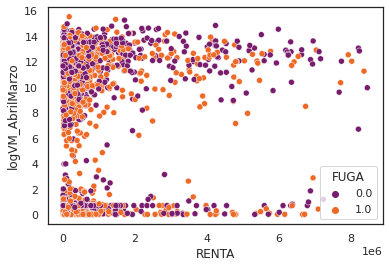

In [ ]:
sns.scatterplot(x='RENTA', y='logVM_AbrilMarzo',  hue='FUGA', data= df2, palette="inferno")

Al igual que en el gráfico de distribución de barras, en este gráfico de dispersión de la transformada logarítmica de la variación mensual de las deudas de Marzo y Abril, podemos observar una gran concentración de datos para rentas entre 0 y 2 millones de pesos, para valores del logaritmo de la razón de la deuda entre 0 y 2 y mayormente entre 7 y 15, independiente de si el cliente fuga o no.

### RFM

Con tal de obtener una visión adicional del dinamismo de la deuda, pero en este caso, que entregue información sobre el conjunto completo de datos del período, es que se propone generar un trío de atributos como los de la transformación RFM, en el que se entregen valores de la actualidad (reciente), la frecuencia y el monto total de los meses con deuda.

In [ ]:
df3 = df2.copy()
df3['Monto_Total_Deuda'] = df3[['D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio', 'D_Agosto', 'D_Septiembre']].sum(axis=1)
df3.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.000026,434358.0,0.004068,5.156197,0.037427,0.000026,12.981627,0.004060,1.817459,0.036744,10.553049,483865
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.000000,1.0,49.000000,0.020408,1.000000,0.693147,0.693147,3.912023,0.020203,0.693147,0.693147,48
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.000002,1.0,324.000000,81.759259,0.110457,0.000002,0.693147,5.783825,4.415936,0.104771,13.311613,633906
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.000195,198999.0,0.000477,0.010526,106.000000,0.000195,12.201060,0.000477,0.010471,4.672829,8.542276,204322


En la tabla anterior podemos observar la incorporación del atributo "Monto Total Deuda", que tal como su nombre lo indica, muestra el acumulado o suma de los montos finales adeudados en cada mes, para cada cliente. Es importante recordar, que por definición del problema, la deuda mensual de los clientes, no se transfiere de un mes a otro. En ese sentido, esta variable nos orienta a cuánto fue el total de deuda existente alcanzada durante el período de análisis, independiente de que haya sido cancelada o que tenga asociada meses de insolvencia, en que dichos montos particulares de cada mes, no fuesen pagados.

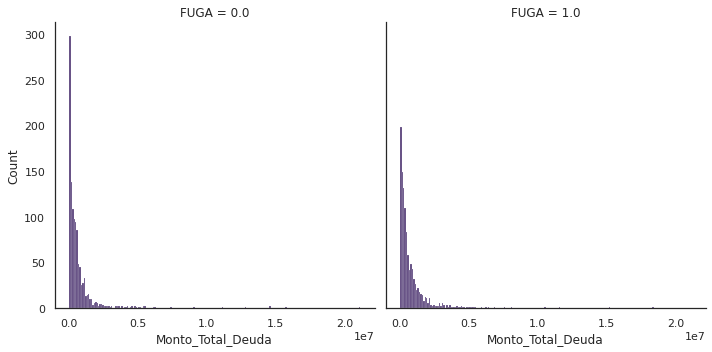

In [ ]:
sns.displot(data=df3, x='Monto_Total_Deuda', col='FUGA')

En los gráficos de distribución recién presentados, se observa una gran concentración de datos en valores bajos y pocos pero ampliamente distribuidos valores altos. De este modo, con tal de obtener mejor entendimiento del comportamiento de la variable del total de la deuda, se vuelve necesaria la aplicación de una transformación logarítmica, la que se presenta a continuación.

In [ ]:
df3['logMTD']=np.log(df3['Monto_Total_Deuda']+1)
df3.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda,logMTD
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.000026,434358.0,0.004068,5.156197,0.037427,0.000026,12.981627,0.004060,1.817459,0.036744,10.553049,483865,13.089563
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.000000,1.0,49.000000,0.020408,1.000000,0.693147,0.693147,3.912023,0.020203,0.693147,0.693147,48,3.891820
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.000002,1.0,324.000000,81.759259,0.110457,0.000002,0.693147,5.783825,4.415936,0.104771,13.311613,633906,13.359658
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.000195,198999.0,0.000477,0.010526,106.000000,0.000195,12.201060,0.000477,0.010471,4.672829,8.542276,204322,12.227457


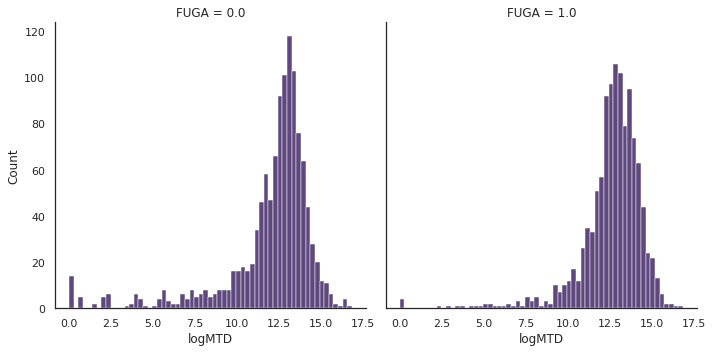

In [ ]:
sns.displot(data=df3, x='logMTD', col='FUGA')

Según lo esperado, en la distribución del logaritmo del monto total de deuda, tenemos los datos restringidos a un rango menor de valores posibles. Se puede observar una distribución cargada hacia la derecha, con concentración de valores entre 10 y 16, con valores acumulados máximos alrededor de 14, independiente si los clientes fugan o no.

###### Recency 

A continuación, se crea la variable "Recency", que da una noción de qué tan actual ha sido la última instancia en que los clientes han tenido una deuda mensual mayor que cero, lo que da una sensibilidad de lo reciente o actual de la condición de deuda, siempre vinculado con el dinamismo.

In [ ]:
dfr= df3[['D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre']]
dfr['D_Marzo'] = np.where(dfr['D_Marzo']> 0, 3, 0)
dfr['D_Abril'] = np.where(dfr['D_Abril']> 0, 4, 0)
dfr['D_Mayo'] = np.where(dfr['D_Mayo']> 0, 5, 0)
dfr['D_Junio'] = np.where(dfr['D_Junio']> 0, 6, 0)
dfr['D_Julio'] = np.where(dfr['D_Julio']> 0, 7, 0)
dfr['D_Agosto'] = np.where(dfr['D_Agosto']> 0, 8, 0)
dfr['D_Septiembre'] = np.where(dfr['D_Septiembre']> 0, 9, 0)
df3['Recency']= dfr.max(axis=1)
df3.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda,logMTD,Recency
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.000026,434358.0,0.004068,5.156197,0.037427,0.000026,12.981627,0.004060,1.817459,0.036744,10.553049,483865,13.089563,9
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.000000,1.0,49.000000,0.020408,1.000000,0.693147,0.693147,3.912023,0.020203,0.693147,0.693147,48,3.891820,7
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.000002,1.0,324.000000,81.759259,0.110457,0.000002,0.693147,5.783825,4.415936,0.104771,13.311613,633906,13.359658,9
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.000195,198999.0,0.000477,0.010526,106.000000,0.000195,12.201060,0.000477,0.010471,4.672829,8.542276,204322,12.227457,9


A continuación se desarrolla la variable que muestra la frecuencia con que los clientes han tenido deuda mensual durante el período de análisis.

In [ ]:
c01 = df3.loc[:, 'D_Marzo':'D_Septiembre']!=0
Aux01 = df3[c01].count(axis=1)
df3['Frecuencia']= Aux01
df3.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda,logMTD,Recency,Frecuencia
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.000026,434358.0,0.004068,5.156197,0.037427,0.000026,12.981627,0.004060,1.817459,0.036744,10.553049,483865,13.089563,9,5
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.000000,1.0,49.000000,0.020408,1.000000,0.693147,0.693147,3.912023,0.020203,0.693147,0.693147,48,3.891820,7,1
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.000002,1.0,324.000000,81.759259,0.110457,0.000002,0.693147,5.783825,4.415936,0.104771,13.311613,633906,13.359658,9,4
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.000195,198999.0,0.000477,0.010526,106.000000,0.000195,12.201060,0.000477,0.010471,4.672829,8.542276,204322,12.227457,9,4


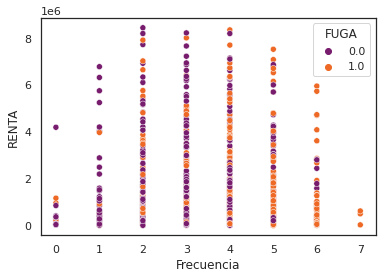

In [ ]:
sns.scatterplot(x='Frecuencia', y='RENTA',  hue='FUGA', data= df3, palette="inferno")

Por tratarse de una opción discreta y restringida a nunca presentar deuda o bien tener deuda todos los meses desde Marzo a Septiembre, es que el gráfico de dispersión anterior nos muestra 8 concentraciones de datos, para valores de 0 a 7. Aquí podemos apreciar una mayor preponderancia de casos de fuga en los casos en que existe deuda en 4 o más meses, independiente del rango de renta. Por su parte, la mayoría de los clientes que no se fugan, tienen deuda mensual entre 0 y 3 meses durante el intervalo de tiempo analizado.

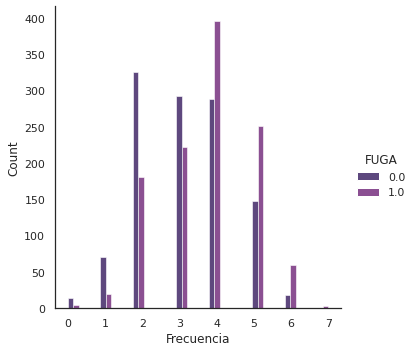

In [ ]:
sns.displot(data=df3, x='Frecuencia', hue='FUGA', multiple='dodge')

El gráfico de barras anterior, refuerza que la distribución de clientes que fuga posee, en general, mayor cantidad de meses con presencia de deuda, que los clientes que se mantienen fieles a la empresa.

Con el fin de poder explorar el comportamiento de fuga de los clientes a través de la relación entre la deuda de los clientes y su poder adquisitivo, de modo que se tenga una noción de que tan alta es la deuda, ya sea total acumulada o la máxima alcanzada en un solo mes, es que se crean a continuación las variables dadas por la razón entre la deuda máxima mensual y la renta, así como la deuda mensual total acumulada y la renta.

Se desarrolla a continuación la generación del atributo dado por la división de la deuda mensual máxima y la renta, para cada cliente en el set de datos.

In [ ]:
df3['DMax/Renta'] = df3['D_max']/df3['RENTA']

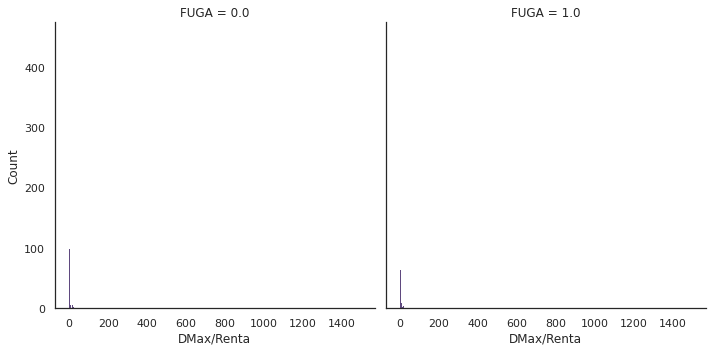

In [ ]:
sns.displot(data=df3, x='DMax/Renta', col='FUGA')

Del gráfico anterior, con tal de obtener mayor noción del comportamiento de la nueva variable, es necesario aplicar una transformación logarítmica que acerque los valores extremos mayores y despliegue de manera menos concentrada los valores menores.

In [ ]:
df3['logDMax/Renta'] = np.log(df3['DMax/Renta']+1)

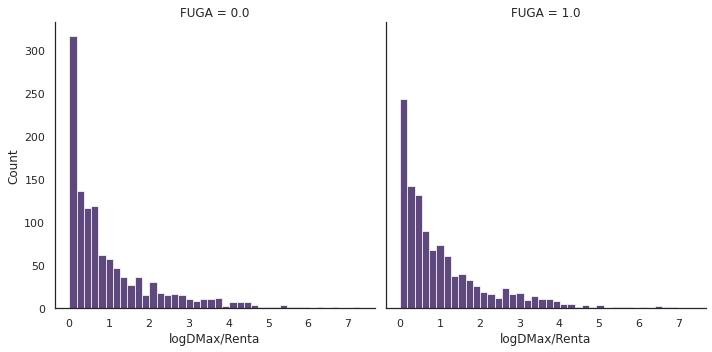

In [ ]:
sns.displot(data=df3, x='logDMax/Renta', col='FUGA')

De los gráficos aquí presentados, tenemos que la mayoría de los clientes, que fugan y no, se concentran en valores entre 0 y 2, principalmente.

A continuación, se realiza un desarrollo análogo con la nueva variable correspondiente a la razón entre monto total de la deuda y la renta, para cada cliente.

In [ ]:
df3['MTD/Renta'] = df3['Monto_Total_Deuda']/df3['RENTA']

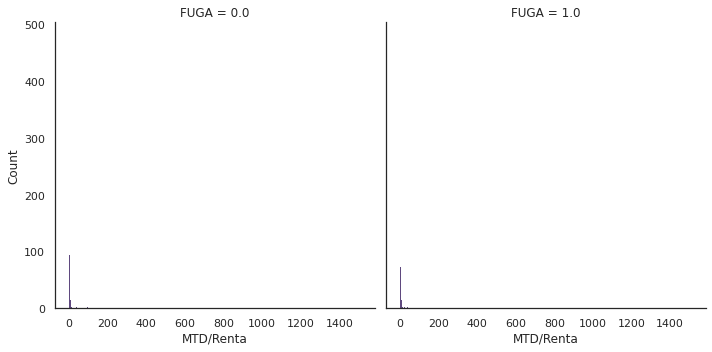

In [ ]:
sns.displot(data=df3, x='MTD/Renta', col='FUGA')

In [ ]:
df3['logMTD/Renta'] = np.log(df3['MTD/Renta']+1)

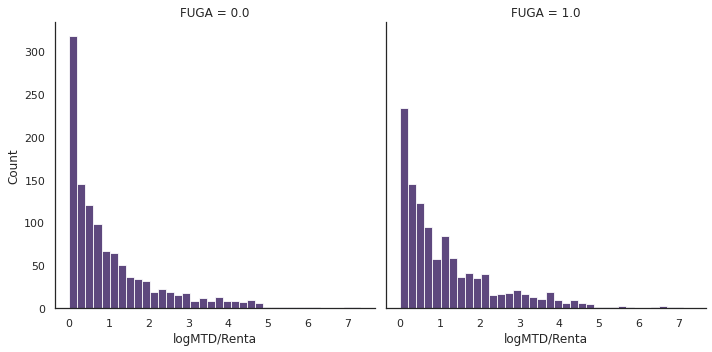

In [ ]:
sns.displot(data=df3, x='logMTD/Renta', col='FUGA')

Tenemos que la mayoría de los clientes, que fugan y no, se concentran en valores entre 0 y 2, principalmente.

## Normalización de Atributos

Abordados los problemas iniciales existentes en la base de datos, ahora corresponde seguir con la normalización de los atributos existentes, con el objetivo de evitar distorsiones debido a las magnitudes diferentes de cada variable, es decir, hacerlas más comparables.

In [ ]:
#dfnorm['CIUDAD'].unique()

In [ ]:
df3.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda,logMTD,Recency,Frecuencia,DMax/Renta,logDMax/Renta,MTD/Renta,logMTD/Renta
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.000026,434358.0,0.004068,5.156197,0.037427,0.000026,12.981627,0.004060,1.817459,0.036744,10.553049,483865,13.089563,9,5,0.581877,0.458612,0.648199,0.499683
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.000000,1.0,49.000000,0.020408,1.000000,0.693147,0.693147,3.912023,0.020203,0.693147,0.693147,48,3.891820,7,1,0.004033,0.004025,0.004033,0.004025
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.000002,1.0,324.000000,81.759259,0.110457,0.000002,0.693147,5.783825,4.415936,0.104771,13.311613,633906,13.359658,9,4,0.365848,0.311775,0.383855,0.324873
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.000195,198999.0,0.000477,0.010526,106.000000,0.000195,12.201060,0.000477,0.010471,4.672829,8.542276,204322,12.227457,9,4,0.311436,0.271123,0.319768,0.277456


In [ ]:
dfnorm = df3.copy()
dfnorm.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda,logMTD,Recency,Frecuencia,DMax/Renta,logDMax/Renta,MTD/Renta,logMTD/Renta
0,1,0,746476,39,12,1,68,213,1.0,0,38292,0,434357,1766,9110,340,340.0,434357.0,161643,2,2000000,0.0,0.0,1,38293,1,434358,1767,9111,341,38293.0,0.000026,434358.0,0.004068,5.156197,0.037427,0.000026,12.981627,0.004060,1.817459,0.036744,10.553049,483865,13.089563,9,5,0.581877,0.458612,0.648199,0.499683
1,2,1,11901,49,12,4,16,89,2.0,0,0,0,0,48,0,0,48.0,48.0,18,1,7500000,1.0,0.0,1,1,1,1,49,1,1,1.0,1.000000,1.0,49.000000,0.020408,1.000000,0.693147,0.693147,3.912023,0.020203,0.693147,0.693147,48,3.891820,7,1,0.004033,0.004025,0.004033,0.004025
2,3,0,1651421,39,14,1,90,16,3.0,0,604169,0,0,323,26489,2925,323.0,604169.0,226688,1,8000000,0.0,0.0,1,604170,1,1,324,26490,2926,604170.0,0.000002,1.0,324.000000,81.759259,0.110457,0.000002,0.693147,5.783825,4.415936,0.104771,13.311613,633906,13.359658,9,4,0.365848,0.311775,0.383855,0.324873
3,4,1,638969,36,18,1,85,115,2.0,0,5125,0,198998,94,0,105,94.0,198998.0,74902,1,2600000,0.0,0.0,1,5126,1,198999,95,1,106,5126.0,0.000195,198999.0,0.000477,0.010526,106.000000,0.000195,12.201060,0.000477,0.010471,4.672829,8.542276,204322,12.227457,9,4,0.311436,0.271123,0.319768,0.277456


In [ ]:
#dfnorm.isnull().sum()

#### Minmax

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfnorm)
scaled = pd.DataFrame(scaled)
scaled.columns = dfnorm.columns
scaled.head(4)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,D_Marzo2,D_Abril2,D_Mayo2,D_Junio2,D_Julio2,D_Agosto2,D_Septiembre2,VM_AbrilMarzo,VM_MayoAbril,VM_JunioMayo,VM_JulioJunio,VM_AgostoJulio,VM_SeptiembreAgosto,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Monto_Total_Deuda,logMTD,Recency,Frecuencia,DMax/Renta,logDMax/Renta,MTD/Renta,logMTD/Renta
0,0.000000,0.0,0.088276,0.390244,0.4,0.0,0.438710,0.411650,0.000000,0.0,0.006968,0.0,0.021050,0.157862,0.102547,0.001362,0.000314,0.021050,0.020806,0.666667,0.200000,0.0,0.0,0.0,0.006968,0.0,0.021050,0.157862,0.102547,0.001362,6.968020e-03,1.409606e-12,2.104997e-02,4.306724e-07,6.546025e-05,2.752854e-07,1.550251e-06,0.770767,0.000443,0.161198,0.003107,0.679989,0.022904,0.776091,1.000000,0.714286,0.000389,0.062739,0.000430,0.068267
1,0.000436,1.0,0.001387,0.634146,0.4,1.0,0.103226,0.170874,0.013514,0.0,0.000000,0.0,0.000000,0.004291,0.000000,0.000000,0.000044,0.000002,0.000002,0.333333,0.933333,1.0,0.0,0.0,0.000000,0.0,0.000000,0.004291,0.000000,0.000000,1.819658e-07,5.435679e-08,4.846226e-08,5.187930e-03,2.579606e-07,7.358651e-06,4.143709e-02,0.041155,0.427387,0.001784,0.058642,0.044663,0.000002,0.230749,0.777778,0.142857,0.000003,0.000551,0.000003,0.000550
2,0.000872,0.0,0.195318,0.390244,0.6,0.0,0.580645,0.029126,0.027027,0.0,0.109938,0.0,0.000000,0.028873,0.298175,0.011716,0.000298,0.029279,0.029178,0.333333,1.000000,0.0,0.0,0.0,0.109938,0.0,0.000000,0.028873,0.298175,0.011716,1.099383e-01,8.007830e-14,4.846226e-08,3.430386e-02,1.037988e-03,8.126937e-07,8.806927e-08,0.041155,0.631881,0.391678,0.008863,0.857738,0.030006,0.792105,1.000000,0.571429,0.000245,0.042651,0.000254,0.044385
3,0.001308,1.0,0.075560,0.317073,1.0,0.0,0.548387,0.221359,0.013514,0.0,0.000933,0.0,0.009644,0.008403,0.000000,0.000421,0.000086,0.009644,0.009641,0.333333,0.280000,0.0,0.0,0.0,0.000933,0.0,0.009644,0.008403,0.000000,0.000421,9.327572e-04,1.059424e-11,9.643941e-03,5.050470e-08,1.325039e-07,7.800311e-04,1.165031e-05,0.724422,0.000052,0.000921,0.395344,0.550424,0.009672,0.724976,1.000000,0.571429,0.000208,0.037090,0.000212,0.037906


In [ ]:
#scaled['SEGURO'] = df3['SEGURO'].values
#scaled['FUGA'] = df3['FUGA'].values
#scaled['CIUDAD'] = df3['CIUDAD'].values
#scaled.head(4)

In [ ]:
#scaled.isnull().sum()

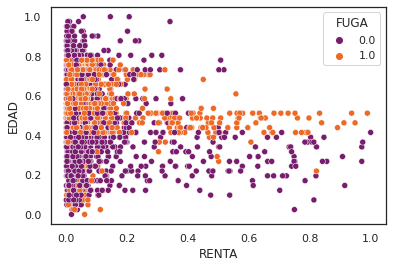

In [ ]:
sns.scatterplot(x='RENTA', y='EDAD',  hue='FUGA', data= scaled, palette="inferno")

Del gráfico de dispersión, se puede observar que hay una concentración de clientes que sí fugan, los cuales poseen edades normalizadas entre 0.4 y 0.8, y cuya renta normalizada varía en todo el intervalo posible, pero que es más frecuente para valores entre 0 y 0.2 del rango original de rentas.

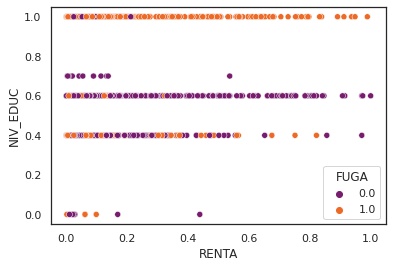

In [ ]:
sns.scatterplot(x='RENTA', y='NIV_EDUC',  hue='FUGA', data= scaled, palette="inferno")

En la dispersión de datos anteriores, dado que el atributo correspondiente a nivel educacional es originalmente una variable categórica, se tiene una concentración de datos para los distintos niveles transformados de educación.

Particularmente, se destaca que en el nivel de educación más alto, correspondiente a educación universitaria completa en la forma original de la variable, existe una gran cantidad de clientes fugados. En el segundo nivel de educación normalizado también se observa presencia de varios clientes fugados.


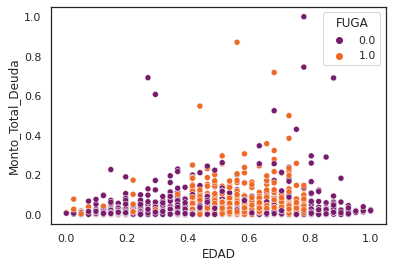

In [ ]:
sns.scatterplot(x='EDAD', y='Monto_Total_Deuda',  hue='FUGA', data= scaled, palette="inferno")

En la dispersión anterior, se aprecia una mayor cantidad de clientes que sí fugan, cuya edad normalizada se mueve entre 0.4 y 0.8, junto a poseer un monto total de deuda normalizado que varía entre 0 y 0.2 principalmente.

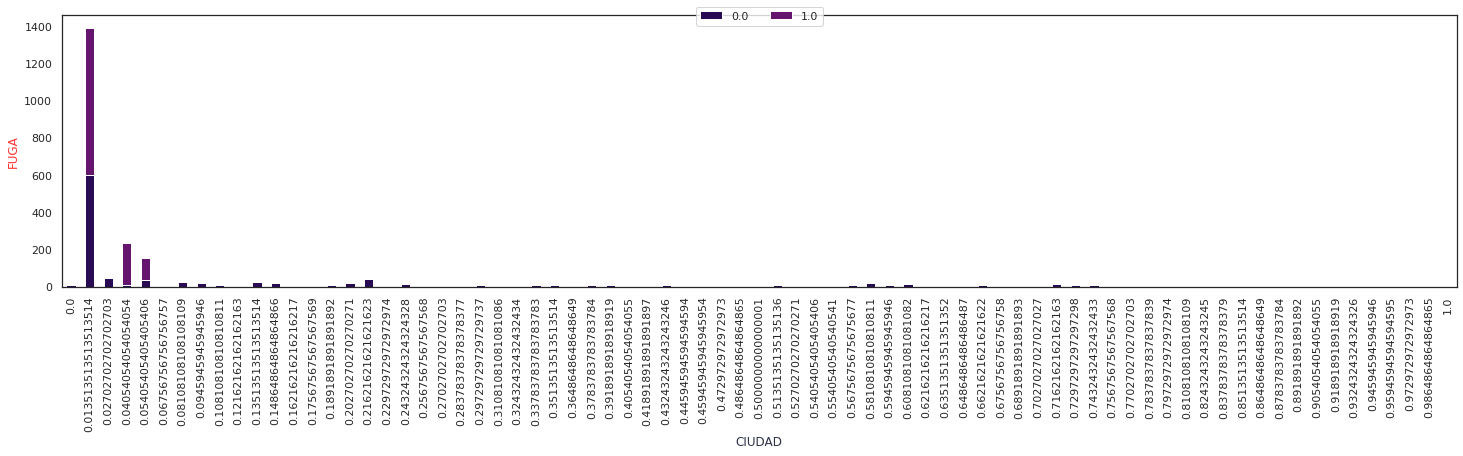

In [ ]:
group1 = scaled.copy()
plt.rcParams["figure.figsize"] = (25, 5)
group1.groupby(['CIUDAD','FUGA']).size().unstack(fill_value=0).plot(kind='bar',stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
plt.xlabel('CIUDAD', color='#2D3249')
plt.ylabel('FUGA', color='#FF3333')
plt.xticks(rotation=90)
plt.show()

## Selección de Atributos

Para realizar la selección de atributos, lo primero que se debe ejecutar, es la eliminación de variables que se presenten redundantes, tal como ocurre con el caso de atributos y sus versiones transformadas.

In [ ]:
DFscaled = scaled.copy()

In [ ]:
DFscaled.drop(['D_Marzo2',	'D_Abril2',	'D_Mayo2',	'D_Junio2',	'D_Julio2',	'D_Agosto2',	'D_Septiembre2'], axis=1, inplace=True)
DFscaled.drop(['VM_AbrilMarzo', 'VM_MayoAbril', 'VM_JunioMayo',	'VM_JulioJunio', 'VM_AgostoJulio', 'VM_SeptiembreAgosto'], axis=1, inplace=True)
DFscaled.drop(['Monto_Total_Deuda'], axis=1, inplace=True)
DFscaled.drop(['DMax/Renta'], axis=1, inplace=True)
DFscaled.drop(['MTD/Renta'], axis=1, inplace=True)
DFscaled.head(5)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,D_min,D_max,D_std,M_MOROSO,MONTO,SEGURO,FUGA,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,logMTD,Recency,Frecuencia,logDMax/Renta,logMTD/Renta
0,0.000000,0.0,0.088276,0.390244,0.4,0.0,0.438710,0.411650,0.000000,0.0,0.006968,0.0,0.021050,0.157862,0.102547,0.001362,0.000314,0.021050,0.020806,0.666667,0.200000,0.0,0.0,1.550251e-06,0.770767,0.000443,0.161198,0.003107,0.679989,0.776091,1.000000,0.714286,0.062739,0.068267
1,0.000436,1.0,0.001387,0.634146,0.4,1.0,0.103226,0.170874,0.013514,0.0,0.000000,0.0,0.000000,0.004291,0.000000,0.000000,0.000044,0.000002,0.000002,0.333333,0.933333,1.0,0.0,4.143709e-02,0.041155,0.427387,0.001784,0.058642,0.044663,0.230749,0.777778,0.142857,0.000551,0.000550
2,0.000872,0.0,0.195318,0.390244,0.6,0.0,0.580645,0.029126,0.027027,0.0,0.109938,0.0,0.000000,0.028873,0.298175,0.011716,0.000298,0.029279,0.029178,0.333333,1.000000,0.0,0.0,8.806927e-08,0.041155,0.631881,0.391678,0.008863,0.857738,0.792105,1.000000,0.571429,0.042651,0.044385
3,0.001308,1.0,0.075560,0.317073,1.0,0.0,0.548387,0.221359,0.013514,0.0,0.000933,0.0,0.009644,0.008403,0.000000,0.000421,0.000086,0.009644,0.009641,0.333333,0.280000,0.0,0.0,1.165031e-05,0.724422,0.000052,0.000921,0.395344,0.550424,0.724976,1.000000,0.571429,0.037090,0.037906
4,0.001744,0.0,0.101718,0.512195,0.6,0.0,0.290323,0.153398,0.013514,0.0,0.002174,0.0,0.003584,0.013319,0.000000,0.001090,0.000137,0.003584,0.003544,0.333333,0.786667,0.0,0.0,4.992771e-06,0.665656,0.000221,0.000581,0.474898,0.604939,0.673893,1.000000,0.571429,0.011285,0.013067


### Varianza 

Con tal de identificar cuáles atributos aportan con la mayor cantidad de varianza a un posible posterior modelo predictivo, es que a continuación se analiza la variación estándar de cada variable.

In [ ]:
DFscaled.std()

ID                        0.288864
GENERO                    0.488182
RENTA                     0.163200
EDAD                      0.194603
NIV_EDUC                  0.258867
E_CIVIL                   0.259469
COD_OFI                   0.259128
COD_COM                   0.164505
CIUDAD                    0.183075
D_Marzo                   0.052673
D_Abril                   0.073210
D_Mayo                    0.047328
D_Junio                   0.032494
D_Julio                   0.096123
D_Agosto                  0.100661
D_Septiembre              0.039530
D_min                     0.036714
D_max                     0.055942
D_std                     0.055989
M_MOROSO                  0.250635
MONTO                     0.305724
SEGURO                    0.406231
FUGA                      0.500090
logVM_MayoAbril           0.067871
logVM_JunioMayo           0.335259
logVM_JulioJunio          0.279958
logVM_AgostoJulio         0.229348
logVM_SeptiembreAgosto    0.256463
logVM_AbrilMarzo    

Del listado anterior, podemos observar que los atributos correspondientes a los valores de las deudas mensuales aisladas, es decir, el valor independiente para cada mes, poseen varias de las menores desviaciones estándares, y por ende variabilidad, de todos los atributos disponibles, siendo la más alta para "D_Agosto" con 0.100661 y la más baja para "D_Junio" con 0.032494, recordando que todos los atributos se encuentran normalizados.

En conjunto con lo anterior, dada la construcción de variables adicionales presentada anteriormente, la información contenida en los atributos de deuda mensual, también se encuentra incorporada en las variables que muestran el dinamismo de la deuda, como lo son las transformadas logarítmicas normalizadas de las variaciones (divisiones) entre meses consecutivos de deuda.

De este modo, dado que las variables de deuda mensual presentan varias de las menores desviaciones estándares y que su información está incorporada en otros nuevos atributos, se opta por eliminar las variables de deuda de Marzo a Septiembre.

Cabe mencionar además, que las otras 3 variables con menor varianza asociada, mostrada mediante la desviación estándar, son los atributos creados de deuda máxima, deuda mínima y desviación estándar de la deuda.

In [ ]:
DFscaled.drop(['D_Marzo',	'D_Abril',	'D_Mayo',	'D_Junio',	'D_Julio',	'D_Agosto',	'D_Septiembre'], axis=1, inplace=True)

### Matriz de Correlación

A partir de aquí, se puede revisar nuevamente la matriz de Correlación para los atributos hasta ahora remanentes.

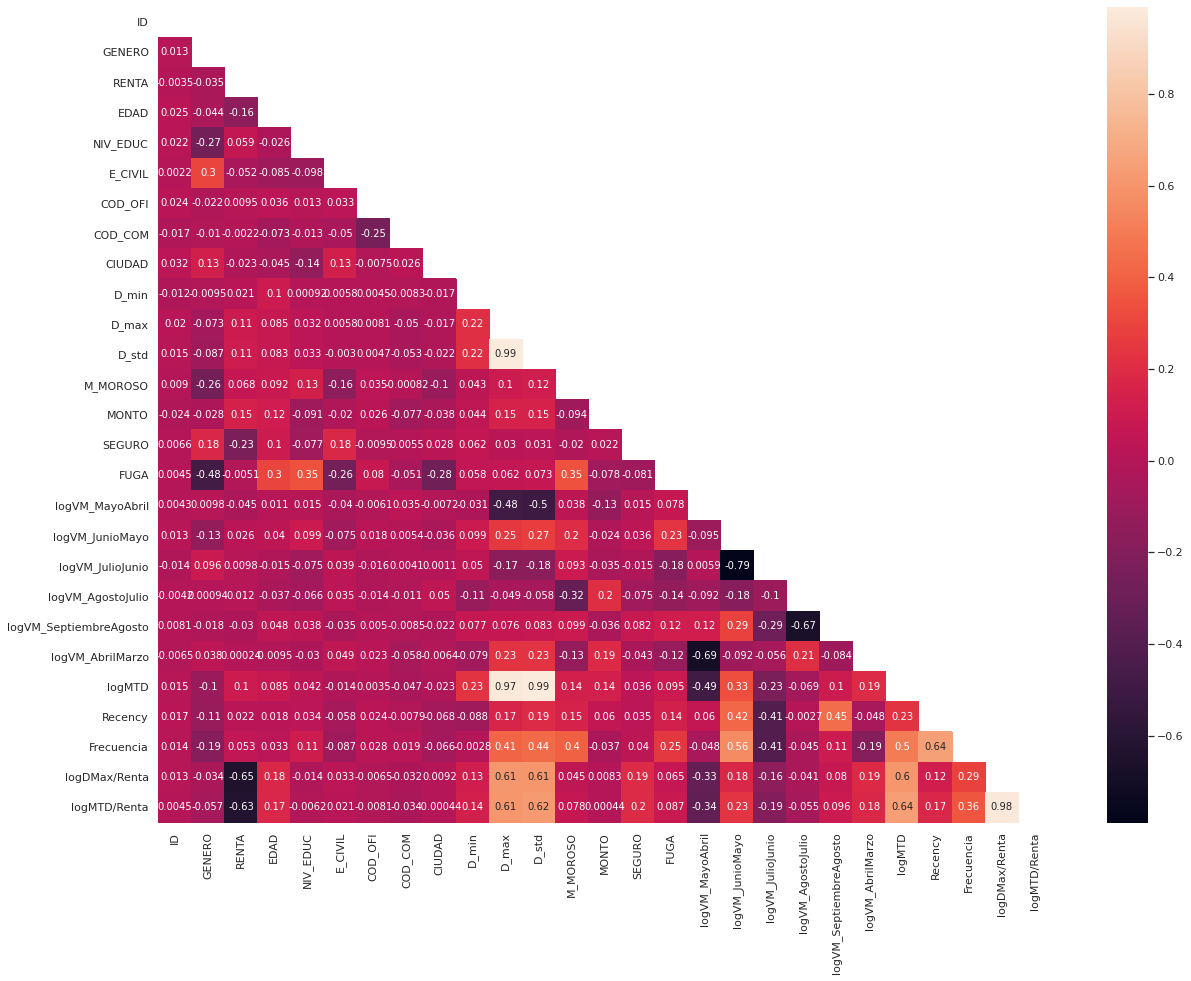

In [ ]:
plt.figure(figsize=(20,15))
corr_matrix = DFscaled.corr(method ='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask, annot=True)

De la nueva visualización anterior, se puede apreciar que destacan las correlaciones directas entre los siguientes pares de atributos:


1.   D_std y D_max, con un coeficiente de correlación de 0.99.
2.   LogMTD y D_max, con un coeficiente de correlación de 0.97.
3.   LogMTD y D_std, con un coeficiente de correlación de 0.99.
4.   LogMTD/Renta y LogDMax/Renta, con un coeficiente de correlación de 0.98.



Teniendo en cuenta la variabilidad presente en cada atributo de manera individual, así como las correlaciones antes mencionadas, al descartar las variables "D_max" y "D_std", se podrían eliminar 2 atributos que no solo contribuyen con poco varianza al resto del conjunto de datos, sino que además generan 3 de las 4 altas correlaciones recién mencionadas.

Cabe señalar en forma complementaria, que todos los valores de deuda mensual, y por ende los valores mínimos, máximos y en alguna medida la desviación, se encuentran incorporados dentro de los atributos que muestran el dinamismo de la deuda, para todos los clientes registrados en el set de datos.

Desde el punto de vista del negocio y el caso de estudio, en este caso orientado a pronosticar comportamiento de fuga, la deuda mínima para los distintos clientes no se presenta como información tan crítica para el análisis, como podrían ser a priori, los meses en que ha habido mora, la renta, la variación de la deuda misma, etc. A esto se suma el hecho ya mencionado de que la variable "D_min", presenta la menor desviación estándar, y por ende contribuye con la menor cantidad de varianza a un futuro modelo predicitivo, en relación con el resto de los atributos existentes.

Dado todo lo antes mencionado, es que se descartan acontinuación, las 3 variables "D_max", "D_min" y "D_std".

In [ ]:
DFscaled.drop(['D_min',	'D_max',	'D_std'], axis=1, inplace=True)

In [ ]:
DFscaled.std()

ID                        0.288864
GENERO                    0.488182
RENTA                     0.163200
EDAD                      0.194603
NIV_EDUC                  0.258867
E_CIVIL                   0.259469
COD_OFI                   0.259128
COD_COM                   0.164505
CIUDAD                    0.183075
M_MOROSO                  0.250635
MONTO                     0.305724
SEGURO                    0.406231
FUGA                      0.500090
logVM_MayoAbril           0.067871
logVM_JunioMayo           0.335259
logVM_JulioJunio          0.279958
logVM_AgostoJulio         0.229348
logVM_SeptiembreAgosto    0.256463
logVM_AbrilMarzo          0.343763
logMTD                    0.141836
Recency                   0.133027
Frecuencia                0.180010
logDMax/Renta             0.159794
logMTD/Renta              0.169038
dtype: float64

### Test Kolmogorov

p-value: 0.0196 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


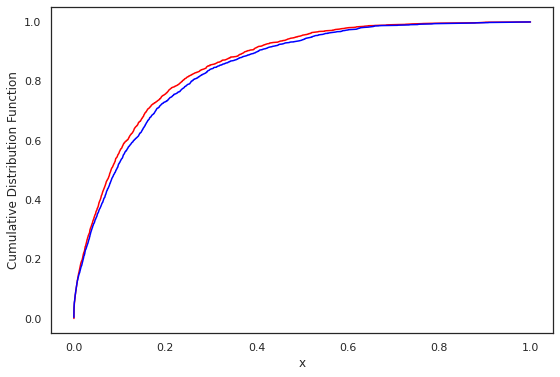

In [ ]:
#@title Test de Hipótesis para logDMax/Renta y logMTD/Renta
plot_kolmogorov(DFscaled['logDMax/Renta'], DFscaled['logMTD/Renta'])

Si bien los atributos logDMax/Renta y logMTD/Renta presentan un coeficiente de correlación igual a 0.98, el test de Kolmogorov-Smirnov nos entrega como resultado que son variables independientes, razón por la cual una no se puede explicar por la otra.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


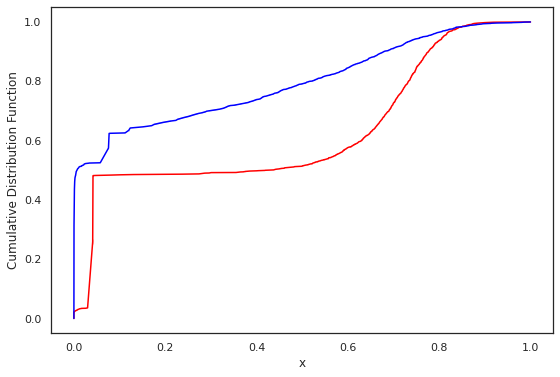

In [ ]:
#@title Test de Hipótesis para logVM_JunioMayo y logVM_JulioJunio
plot_kolmogorov(DFscaled['logVM_JunioMayo'], DFscaled['logVM_JulioJunio'])

Si bien los atributos logVM_JunioMayo y logVM_JulioJunio presentan un coeficiente de correlación igual a -0.79, el test de Kolmogorov-Smirnov nos entrega como resultado que son variables independientes, razón por la cual una no se puede explicar por la otra.

In [ ]:
DFscaled.head(3)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,logMTD,Recency,Frecuencia,logDMax/Renta,logMTD/Renta
0,0.000000,0.0,0.088276,0.390244,0.4,0.0,0.438710,0.411650,0.000000,0.666667,0.200000,0.0,0.0,1.550251e-06,0.770767,0.000443,0.161198,0.003107,0.679989,0.776091,1.000000,0.714286,0.062739,0.068267
1,0.000436,1.0,0.001387,0.634146,0.4,1.0,0.103226,0.170874,0.013514,0.333333,0.933333,1.0,0.0,4.143709e-02,0.041155,0.427387,0.001784,0.058642,0.044663,0.230749,0.777778,0.142857,0.000551,0.000550
2,0.000872,0.0,0.195318,0.390244,0.6,0.0,0.580645,0.029126,0.027027,0.333333,1.000000,0.0,0.0,8.806927e-08,0.041155,0.631881,0.391678,0.008863,0.857738,0.792105,1.000000,0.571429,0.042651,0.044385


In [ ]:
# @title Test de Hipótesis para GENERO y RENTA
ct1 = pd.concat([DFscaled['GENERO'],pd.cut(DFscaled['RENTA'], bins=5)],axis=1).groupby(['RENTA', 'GENERO']).size().unstack('GENERO')
ct1

GENERO,0.0,1.0
RENTA,,
"(-0.001, 0.2]",1252,745
"(0.2, 0.4]",73,64
"(0.4, 0.6]",42,44
"(0.6, 0.8]",22,29
"(0.8, 1.0]",7,16


In [ ]:
from scipy.stats import chi2_contingency 
# aplicamos el test
stat, p_val, dof, expected = chi2_contingency(ct1) 
  
# interpretamos el p-value 
alpha = 0.05
print(f"p-value = {round(p_val,4)}") 
if p_val <= alpha: 
    print('Las distribuciones son independientes (Acepta Hipótesis Nula)') 
else: 
    print('Las distribuciones son dependientes (Rechaza Hipótesis Nula)') 

p-value = 0.0
Las distribuciones son independientes (Acepta Hipótesis Nula)


Del Test de Chi Cuadrado anterior obtenemos que las variables GENERO y RENTA son independientes, por lo que no se puede explicar o modelar una en base a la otra. De este modo, no es posible descartar ninguna de ellas de la base de datos.

In [ ]:
# @title Test de Hipótesis para EDAD y RENTA
ct2 = pd.concat([pd.cut(DFscaled['EDAD'], bins=5),pd.cut(DFscaled['RENTA'], bins=5)],axis=1).groupby(['RENTA', 'EDAD']).size().unstack('EDAD')
ct2

EDAD,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
RENTA,,,,,
"(-0.001, 0.2]",186,321,766,641,83
"(0.2, 0.4]",9,28,70,22,8
"(0.4, 0.6]",5,28,48,5,0
"(0.6, 0.8]",9,20,22,0,0
"(0.8, 1.0]",3,12,8,0,0


In [ ]:
stat, p_val, dof, expected = chi2_contingency(ct2)
alpha = 0.05
print(f"p-value = {round(p_val,4)}") 
if p_val <= alpha: 
    print('Las distribuciones son independientes (Acepta Hipótesis Nula)') 
else: 
    print('Las distribuciones son dependientes (Rechaza Hipótesis Nula)') 

p-value = 0.0
Las distribuciones son independientes (Acepta Hipótesis Nula)


Del Test de Chi Cuadrado anterior obtenemos que las variables EDAD y RENTA son independientes, por lo que no se puede explicar o modelar una en base a la otra. De este modo, no es posible descartar ninguna de ellas de la base de datos.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


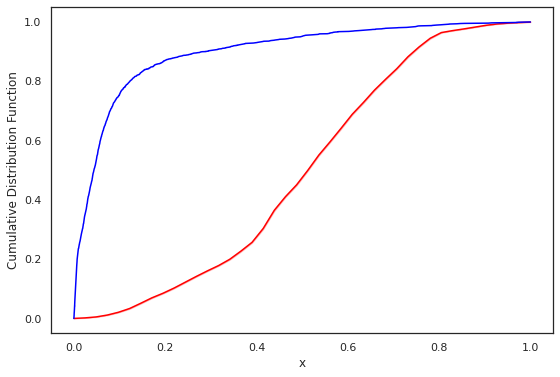

In [ ]:
#@title Test de Hipótesis KS para EDAD y RENTA
plot_kolmogorov(DFscaled['EDAD'], DFscaled['RENTA'])

Del test Kolmogorov - Smirnov anterior, tenemos que las variables EDAD y RENTA son independientes, por lo que no podemos desechar ninguno de los dos atributos.

In [ ]:
# @title Test de Hipótesis para NIV_EDUC y RENTA
ct3 = pd.concat([DFscaled['NIV_EDUC'],pd.cut(DFscaled['RENTA'], bins=5)],axis=1).groupby(['RENTA', 'NIV_EDUC']).size().unstack('NIV_EDUC')
ct3

NIV_EDUC,0.0,0.4,0.6,0.7,1.0
RENTA,,,,,
"(-0.001, 0.2]",10,550,580,11,846
"(0.2, 0.4]",0,44,46,0,47
"(0.4, 0.6]",1,15,31,1,38
"(0.6, 0.8]",0,3,28,0,20
"(0.8, 1.0]",0,3,13,0,7


In [ ]:
stat, p_val, dof, expected = chi2_contingency(ct3)
alpha = 0.05
print(f"p-value = {round(p_val,4)}") 
if p_val <= alpha: 
    print('Las distribuciones son independientes (Acepta Hipótesis Nula)') 
else: 
    print('Las distribuciones son dependientes (Rechaza Hipótesis Nula)') 

p-value = 0.0011
Las distribuciones son independientes (Acepta Hipótesis Nula)


Del Test de Chi Cuadrado anterior obtenemos que las variables NIVEL EDUCACIONAL y RENTA son independientes, por lo que no se puede explicar o modelar una en base a la otra. De este modo, no es posible descartar ninguna de ellas de la base de datos.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


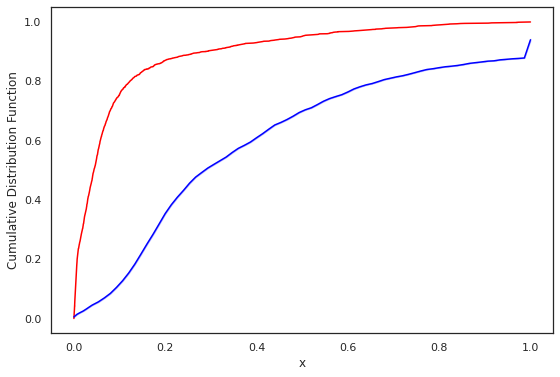

In [ ]:
#@title Test de Hipótesis KS para RENTA y MONTO
plot_kolmogorov(DFscaled['RENTA'], DFscaled['MONTO'])

Del test Kolmogorov - Smirnov anterior, tenemos que las variables RENTA y MONTO son independientes, por lo que no podemos desechar ninguno de los dos atributos (al menos, por decisión entre ellos).

In [ ]:
# @title Test de Hipótesis para NIV_EDUC y E_CIVIL
ct4 = pd.concat([DFscaled['NIV_EDUC'],DFscaled['E_CIVIL']],axis=1).groupby(['E_CIVIL', 'NIV_EDUC']).size().unstack('E_CIVIL')
ct4.fillna(0, inplace=True)
ct4

E_CIVIL,0.000000,0.333333,0.666667,1.000000
NIV_EDUC,,,,
0.0,7.0,2.0,2.0,0.0
0.4,429.0,133.0,26.0,27.0
0.6,290.0,304.0,41.0,63.0
0.7,2.0,10.0,0.0,0.0
1.0,712.0,193.0,45.0,8.0


In [ ]:
stat, p_val, dof, expected = chi2_contingency(ct4)
alpha = 0.05
print(f"p-value = {round(p_val,4)}") 
if p_val <= alpha: 
    print('Las distribuciones son independientes (Acepta Hipótesis Nula)') 
else: 
    print('Las distribuciones son dependientes (Rechaza Hipótesis Nula)') 

p-value = 0.0
Las distribuciones son independientes (Acepta Hipótesis Nula)


Del Test de Chi Cuadrado anterior obtenemos que las variables NIVEL EDUCACIONAL y E_CIVIL son independientes, por lo que no se puede explicar o modelar una en base a la otra. De este modo, no es posible descartar ninguna de ellas de la base de datos.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


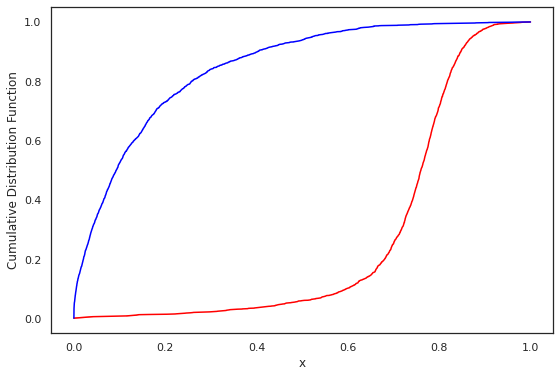

In [ ]:
#@title Test de Hipótesis KS para logMTD y logMTD/Renta
plot_kolmogorov(DFscaled['logMTD'], DFscaled['logMTD/Renta'])

Del test Kolmogorov - Smirnov anterior, tenemos que las variables logMTD y logMTD/Renta son independientes, a pesar de la construcción similar de cada una de ellas, por lo que no podemos desechar ninguno de los dos atributos (al menos, por decisión entre ellos).

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


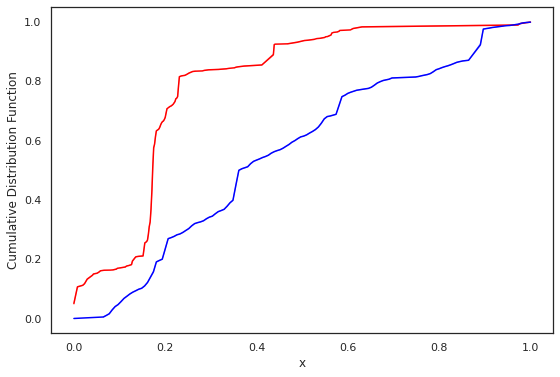

In [ ]:
#@title Test de Hipótesis KS para COD_COM y COD_OFI
plot_kolmogorov(DFscaled['COD_COM'], DFscaled['COD_OFI'])

Del test Kolmogorov - Smirnov anterior, tenemos que las variables COD_COM y COD_OFI son independientes, por lo que no podemos desechar ninguno de los dos atributos.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


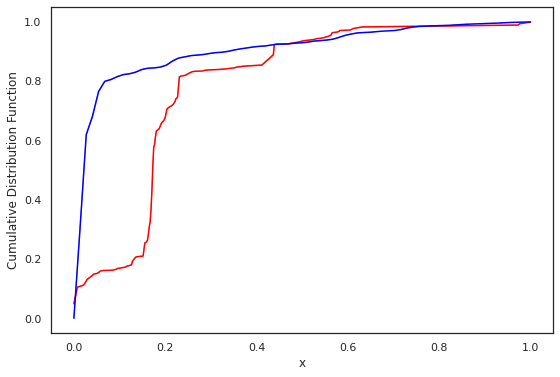

In [ ]:
#@title Test de Hipótesis KS para COD_COM y CIUDAD
plot_kolmogorov(DFscaled['COD_COM'], DFscaled['CIUDAD'])

Del test Kolmogorov - Smirnov anterior, tenemos que las variables COD_COM y CIUDAD son independientes, por lo que a priori, no podemos desechar ninguno de los dos atributos, según test de hipótesis.

p-value: 0.0 | alpha: 0.05
Las distribuciones son independientes (Rechaza Hipótesis Nula)


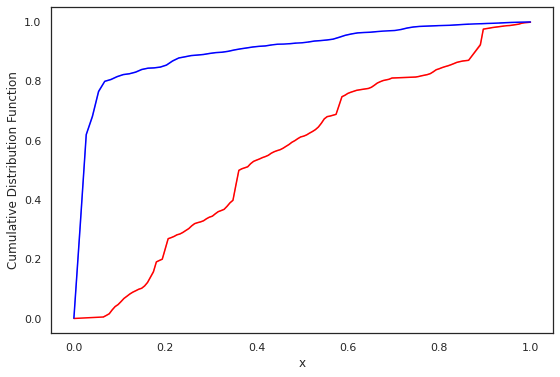

In [ ]:
#@title Test de Hipótesis KS para COD_OFI y CIUDAD
plot_kolmogorov(DFscaled['COD_OFI'], DFscaled['CIUDAD'])

Del test Kolmogorov - Smirnov anterior, tenemos que las variables COD_OFI y CIUDAD son independientes, por lo que a priori, no podemos desechar ninguno de los dos atributos, según test de hipótesis.



A nivel general, los atributos COD_OFI, COD_COM y CIUDAD, nos aportan información asociada a la ubicación espacial o geográfica de los clientes del set de datos. En forma complementaria, es inherente a dichas variables que, desde el punto de vista del negocio, existe algún grado de vínculo entre ellas, puesto que las oficinas, necesariamente están ubicadas en una comuna espcífica, y a su vez, las comunas son directamente vinculadas con las ciudades.

Si bien lo anterior es válido desde la intuición y el sentido común, en la base de datos disponible, no se ve reflejado en forma estadísticamente significativa, puntualmente a través de los test de hipótesis antes desarrollados, puesto que, más allá de la normalización de los datos, los códigos de oficina, los códigos de comuna y las ciudades, no han sido imputadas de forma consistente, con tal de que la relación natural antes planteada, pueda ser evidenciada mediante los códigos esepcíficos.

Cabe señalar, que si se siguiese algún estandar conocido para asignación del código de oficina en conjunto con el código de comuna, vinculado este último de alguna manera correlativa a la ciudad, podría quizás verse reflejado de manera más fácil, la relación estadísticamente significativa en los test de hipótesis. En el caso del set de datos, se desconoce la lógica o arbitrariedad de la imputación realizada por la organización.

De este modo, considerando que los 3 atributos antes mencionados apuntan de forma general a la misma información, es que desde el punto de vista del negocio, se define reducir la dimensionalidad del problema, eliminando 2 de las 3 variables con orientación espacial. Particularmente, se define dejar el atributo CIUDAD.

In [ ]:
DFscaled.drop(['COD_OFI', 'COD_COM'], axis=1, inplace=True)

In [ ]:
# @title Test de Hipótesis para M_MOROSO y RENTA
ct5 = pd.concat([DFscaled['M_MOROSO'],pd.cut(DFscaled['RENTA'], bins=5)],axis=1).groupby(['RENTA', 'M_MOROSO']).size().unstack('M_MOROSO')
ct5

M_MOROSO,0.000000,0.333333,0.666667,1.000000
RENTA,,,,
"(-0.001, 0.2]",210,1238,390,159
"(0.2, 0.4]",16,82,22,17
"(0.4, 0.6]",7,58,11,10
"(0.6, 0.8]",6,34,6,5
"(0.8, 1.0]",2,18,2,1


In [ ]:
stat, p_val, dof, expected = chi2_contingency(ct5)
alpha = 0.05
print(f"p-value = {round(p_val,4)}") 
if p_val <= alpha: 
    print('Las distribuciones son independientes (Acepta Hipótesis Nula)') 
else: 
    print('Las distribuciones son dependientes (Rechaza Hipótesis Nula)') 

p-value = 0.4067
Las distribuciones son dependientes (Rechaza Hipótesis Nula)


Del Test de Chi Cuadrado anterior obtenemos que las variables M_MOROSO y RENTA son dependientes, por lo que sí se puede explicar o modelar una en base a la otra. De este modo, es posible eliminar una ellas de la base de datos.

In [ ]:
# @title Test de Hipótesis para M_MOROSO y FUGA
ct6 = pd.concat([DFscaled['M_MOROSO'],DFscaled['FUGA']],axis=1).groupby(['FUGA', 'M_MOROSO']).size().unstack('M_MOROSO')
ct6.fillna(0, inplace=True)
ct6

M_MOROSO,0.000000,0.333333,0.666667,1.000000
FUGA,,,,
0.0,241.0,730.0,119.0,67.0
1.0,0.0,700.0,312.0,125.0


In [ ]:
stat, p_val, dof, expected = chi2_contingency(ct6)
alpha = 0.05
print(f"p-value = {round(p_val,4)}") 
if p_val <= alpha: 
    print('Las distribuciones son independientes (Acepta Hipótesis Nula)') 
else: 
    print('Las distribuciones son dependientes (Rechaza Hipótesis Nula)') 

p-value = 0.0
Las distribuciones son independientes (Acepta Hipótesis Nula)


Del test anterior, tenemos que el atributo M_MOROSO no explica por sí solo el comportamiento de la variable objetivo FUGA. Sin embargo, se mantiene su utilización, puesto que colabora con el resto de los atributos a aportar varianza al caso de estudio.

A continuación, según lo ya analizado, se define eliminar el atributo RENTA, puesto que es dependiente con la variable M_MOROSO, permitiendo a ésta última explicar el comportamiento de la primera. A esto se debe sumar que la información de RENTA, también se encuentra de alguna manera contenida en las variables logDMax/Renta y logMTD/Renta. Por último, y también asociado a estas dos variables recién mencionadas, al eliminar el atributo RENTA, se evitará tener las correlaciones mostradas en la matriz, iguales a -0.63 y -0.65, las que si bien tienen una naturaleza media en cuanto a su intensidad, se cuentan entre las más altas correlaciones remanentes dentro del conjunto de atributos, permitiendo evitar mayores problemas en los futuros modelos predictivos.

In [ ]:
DFscaled.drop(['RENTA'], axis=1, inplace=True)

Por otro lado, si bien anteriormente ya se evidenció mediante el test de Kolmogorov - Smirnov que las variables logMTD y logMTD/Renta son estadísticamente independientes, por naturaleza misma de la construcción de dichas variables, un incorpora a la otra.

Desde el punto de vista del negocio, recordando que las deudas mensuales no pasan o se acumulan de un mes al siguiente, resulta más interesante tener una visión del total de deuda existente durante el período de análisis en relación con el poder adquisitivo de los clientes. De este modo, el atributo sintético logMTD/Renta, nos aporta mayor cantidad de información respecto a la naturaleza particular de cada cliente. Cabe señalar, que esto último se ve avalado en la varianza, medida a través de la desviación estándar para cada variable, donde este estadístico, es mayor para logMTD/Renta, igual a 0.169038, que para logMTD, en cuyo caso tenemos un valor de 0.141836, siendo alrededor de 19% menor.

En vista de lo anterior, y con tal de reducir la dimensionalidad del problema en análisis, se define eliminar la variable logMTD.

In [ ]:
DFscaled.drop(['logMTD'], axis=1, inplace=True)

Como resultado de la construcción, análisis y eliminación de variables, tenemos 19 atributos en nuestro set de datos, de los que podemos identificar, a grandes rasgos, 3 grupos:


*   Variables descriptivas de los clientes como personas naturales, que corresponden a género, edad, estado civil, nivel educacional y ciudad.
*   Variables descriptivas de los clientes en su condición general de afiliado a la entidad financiera, enfocado en su situación de usuario, que considera los meses en que ha presentado mora, los montos preaprobados de crédito y su condición de asegurado o no.
*   Variables de dinamismo de la deuda del cliente, que apuntan a la evolución temporal de la deuda mensual, así como al monto de la misma en el período. En este grupo particular, tenemos la razón de deuda entre meses consecutivos, la frecuencia con que se ha presentado una deuda no nula durante un mes, lo reciente de la existencia de una deuda no nula, así como las deudas máxima en un mes y el total sumado del intervalo de tiempo estudiado, pero estas últimas, ambas comparadas con el ingreso, y por ende, con la capacidad de pago, de cada cliente.



In [ ]:
DFscaled

,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Recency,Frecuencia,logDMax/Renta,logMTD/Renta
0,0.000000,0.0,0.390244,0.4,0.000000,0.000000,0.666667,0.200000,0.0,0.0,1.550251e-06,0.770767,4.434934e-04,0.161198,0.003107,6.799887e-01,1.000000,0.714286,0.062739,0.068267
1,0.000436,1.0,0.634146,0.4,1.000000,0.013514,0.333333,0.933333,1.0,0.0,4.143709e-02,0.041155,4.273872e-01,0.001784,0.058642,4.466311e-02,0.777778,0.142857,0.000551,0.000550
2,0.000872,0.0,0.390244,0.6,0.000000,0.027027,0.333333,1.000000,0.0,0.0,8.806927e-08,0.041155,6.318809e-01,0.391678,0.008863,8.577376e-01,1.000000,0.571429,0.042651,0.044385
3,0.001308,1.0,0.317073,1.0,0.000000,0.013514,0.333333,0.280000,0.0,0.0,1.165031e-05,0.724422,5.210149e-05,0.000921,0.395344,5.504240e-01,1.000000,0.571429,0.037090,0.037906
4,0.001744,0.0,0.512195,0.6,0.000000,0.013514,0.333333,0.786667,0.0,0.0,4.992771e-06,0.665656,2.213067e-04,0.000581,0.474898,6.049390e-01,1.000000,0.571429,0.011285,0.013067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,0.998256,1.0,0.487805,0.6,0.333333,0.013514,1.000000,0.080000,1.0,0.0,5.391885e-05,0.794086,6.796912e-04,0.041998,0.004701,4.517696e-01,1.000000,0.714286,0.194269,0.195245
2290,0.998692,0.0,0.756098,0.6,0.333333,0.054054,0.333333,0.173333,0.0,1.0,2.173877e-07,0.820781,2.842918e-07,0.025509,0.435503,8.038747e-01,1.000000,0.571429,0.373521,0.402737
2291,0.999128,0.0,0.682927,1.0,0.333333,0.040541,0.333333,0.493333,0.0,1.0,4.143709e-02,0.041155,8.091806e-01,0.000046,0.058642,6.351399e-08,0.777778,0.285714,0.095141,0.095170
2292,0.999564,0.0,0.463415,1.0,0.000000,0.013514,0.666667,0.546667,0.0,1.0,1.361196e-07,0.739666,1.609594e-05,0.334199,0.008696,8.322323e-01,1.000000,0.714286,0.013137,0.020865


In [ ]:
DFscaled.std()

ID                        0.288864
GENERO                    0.488182
EDAD                      0.194603
NIV_EDUC                  0.258867
E_CIVIL                   0.259469
CIUDAD                    0.183075
M_MOROSO                  0.250635
MONTO                     0.305724
SEGURO                    0.406231
FUGA                      0.500090
logVM_MayoAbril           0.067871
logVM_JunioMayo           0.335259
logVM_JulioJunio          0.279958
logVM_AgostoJulio         0.229348
logVM_SeptiembreAgosto    0.256463
logVM_AbrilMarzo          0.343763
Recency                   0.133027
Frecuencia                0.180010
logDMax/Renta             0.159794
logMTD/Renta              0.169038
dtype: float64

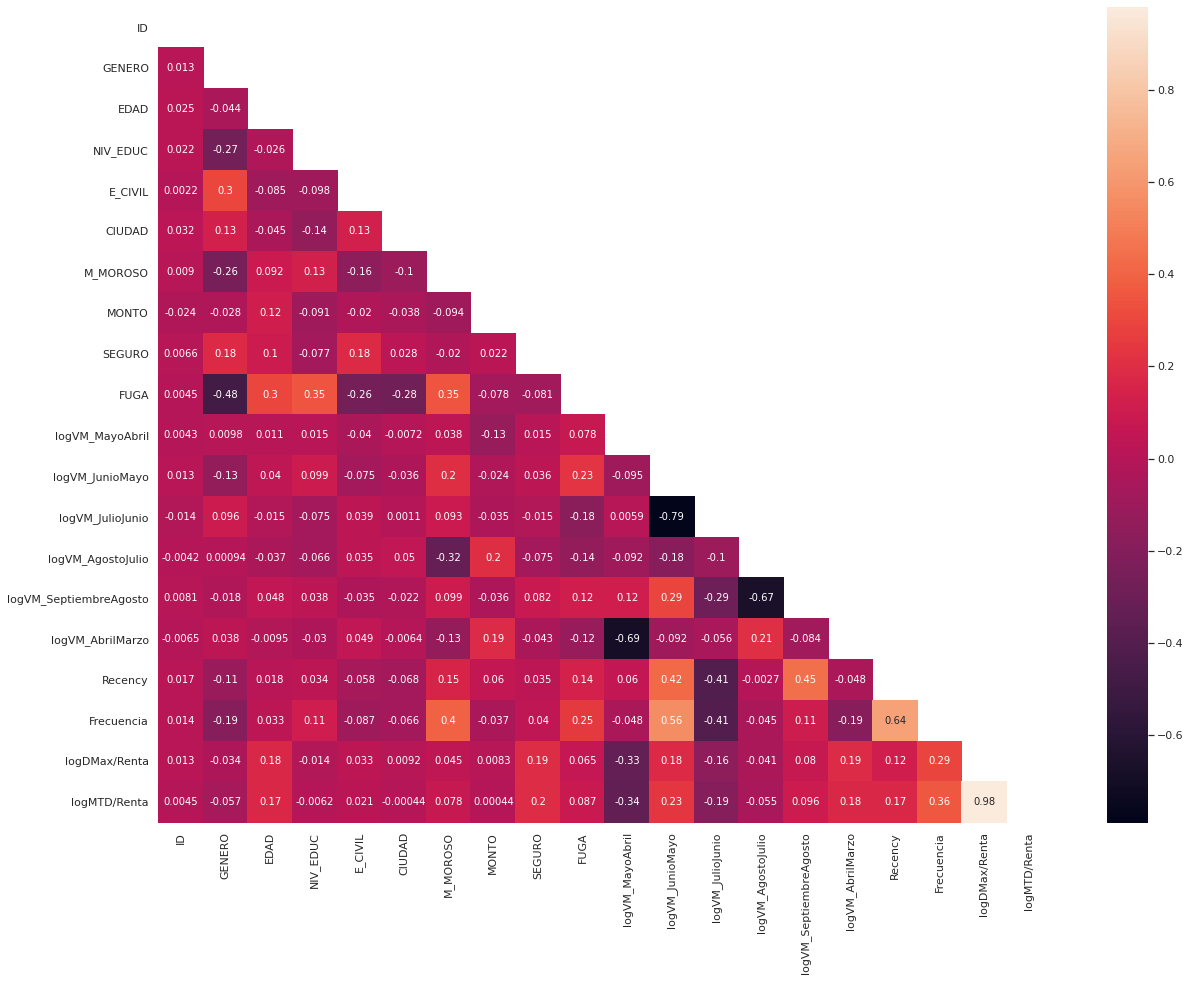

In [ ]:
plt.figure(figsize=(20,15))
corr_matrix = DFscaled.corr(method ='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask, annot=True)

In [ ]:
McovDF = DFscaled.cov()
McovDF

,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,logVM_MayoAbril,logVM_JunioMayo,logVM_JulioJunio,logVM_AgostoJulio,logVM_SeptiembreAgosto,logVM_AbrilMarzo,Recency,Frecuencia,logDMax/Renta,logMTD/Renta
ID,0.083442,0.001860,0.001541,0.001481,-0.000140,0.003616,0.000988,-0.002131,0.000778,0.000653,-0.000061,0.001054,-0.002199,0.000872,0.001853,0.000097,-0.000145,0.000540,-0.000111,-0.000273
GENERO,0.001860,0.238322,-0.004655,-0.037044,0.035811,0.015406,-0.027867,-0.001136,0.035274,-0.116042,0.000392,-0.022282,0.009442,0.002594,-0.002991,0.002870,-0.008157,-0.017354,0.000925,-0.000743
EDAD,0.001541,-0.004655,0.037870,-0.000487,-0.004900,-0.003334,0.004558,0.009259,0.008780,0.026413,0.000709,0.002258,-0.000215,0.000223,0.002803,-0.001796,0.000281,0.001404,0.005046,0.005378
NIV_EDUC,0.001481,-0.037044,-0.000487,0.067012,-0.009055,-0.006805,0.008627,-0.008199,-0.008893,0.049503,-0.000681,0.010452,-0.005576,-0.003627,0.002105,-0.000018,0.001559,0.005585,-0.001477,-0.001131
E_CIVIL,-0.000140,0.035811,-0.004900,-0.009055,0.067324,0.003356,-0.007765,-0.000828,0.013295,-0.031389,-0.000322,-0.005099,0.002132,0.002429,-0.002327,0.003073,-0.001676,-0.003184,0.001724,0.001319
CIUDAD,0.003616,0.015406,-0.003334,-0.006805,0.003356,0.033516,-0.006705,-0.001771,0.004745,-0.034841,-0.000123,-0.002486,0.000091,-0.000558,0.000053,0.001082,-0.001551,-0.003163,0.000110,-0.000143
M_MOROSO,0.000988,-0.027867,0.004558,0.008627,-0.007765,-0.006705,0.062818,-0.004669,-0.000669,0.040340,-0.000351,0.015945,0.006433,-0.014903,0.007383,-0.007413,0.006200,0.017263,0.000390,0.001449
MONTO,-0.002131,-0.001136,0.009259,-0.008199,-0.000828,-0.001771,-0.004669,0.093467,0.002939,-0.017459,0.002201,-0.004663,0.000359,0.014549,0.002161,0.012351,0.001734,-0.000924,0.002534,0.002429
SEGURO,0.000778,0.035274,0.008780,-0.008893,0.013295,0.004745,-0.000669,0.002939,0.165024,-0.016536,-0.000342,0.003921,-0.000219,-0.003244,0.009387,-0.005603,0.001864,0.002599,0.014226,0.014808
FUGA,0.000653,-0.116042,0.026413,0.049503,-0.031389,-0.034841,0.040340,-0.017459,-0.016536,0.250090,-0.001346,0.042426,-0.022338,-0.014276,0.013934,-0.011015,0.008354,0.022822,0.003046,0.005096


In [ ]:
dfpro = DFscaled.copy()

In [ ]:
# @title Descarga de dataframe resultante
from google.colab import files
dfpro.to_csv('dfpro.csv')
files.download('dfpro.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>